Name: Dr. Tabitha L. James

Assignment: Homework #5 to comment and modify classification code.

In [1]:
import sklearn # imports the scikit learn library
import numpy as np # impirts the nump library as np

from sklearn.datasets import fetch_openml # imports the openml function to load datasets form OpenMl

mnist = fetch_openml('mnist_784', as_frame=False) # loads the MNIST dataset from OpenML, returns the dataset as an array instead of pd df

In [2]:
X, y = mnist.data, mnist.target # assigns the data and target variables from MNIST dataset

In [3]:
X # displays content of variable x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X.shape # displays the shape of variable x, contains the number of rows and columns in the array

(70000, 784)

In [5]:
y # displays the variable y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape # displays the shape of variable y

(70000,)

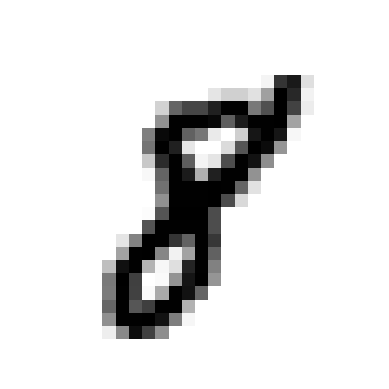

In [7]:
import matplotlib.pyplot as plt # imports matplotlib library as plt

def plot_digit(image_data): # defines a function called plot_digit that read image_data
    image = image_data.reshape(28, 28) # reshapes the image data to a 28x28 pixel image
    plt.imshow(image, cmap="binary") #displays image using matplotlib, binary specifies it should be black and white
    plt.axis("off") # turns off axes for plot

some_digit = X[17] # assigns image 18 to variable some_digit
plot_digit(some_digit) # calls plot digit to display image 18
plt.show() # displays the plot

In [8]:
y[17] #shows the label for the image X[17] which is currently stored in the variable some_image

'8'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # splits data set into training and testing set

In the code that follows: comment each line as above, but this time do one other step.  

Change the code to predict some other number besides 5 or 3 instead, and prove that it works -- that is also modify lines 40, 47, 48, and 41 below as necessary to prove that your code works.

As you work your way through the rest of the code, you'll want to adapt it as necessary to accomodate the change you made.

In [10]:
y_train_8 = (y_train == '8') # creates an array called y_train_8 that contains boolean values stating if each image is an 8 or not in training set
y_test_8 = (y_test == '8') # creates an array called y_train_8 that contains boolean values stating if each image is an 8 or not in testing set

from sklearn.linear_model import SGDClassifier # imports SGDClassifier to train stochastic gradient decscent classifier

sgd_clf = SGDClassifier(random_state=42) # creates a new SGDC object with random state of 42 in order to recreate results
sgd_clf.fit(X_train, y_train_8) # trains the SGDC on training data, xtrain contains images and ytrain8 contains labels

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit]) #uses the trained SGDC to predict label of image stored in somedigit variable

array([ True])

In [12]:
some_other_digit = X[500] # assigns image 501 in dataset to someotherdigit variable
y[500] # shows the label for iamge 501

'3'

In [13]:
sgd_clf.predict([some_other_digit]) # uses trained SGDC to predict label for image stored in someotherdigit

array([False])

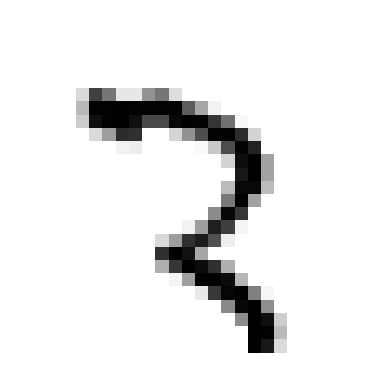

In [14]:
second_some_digit = X[500] # assigns image 501 to variable secondsomedigit
plot_digit(second_some_digit) # calls plot digit to display image 501
plt.show() # display image 501 as plot

In [15]:
from sklearn.model_selection import cross_val_score # import cross_val_score function to eval perf of model using K-Cross fold validation

cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy") # performs 3 fold cross validation on SCDG using training data and evals the accuracy

array([0.909  , 0.9286 , 0.88285])

In [16]:
from sklearn.dummy import DummyClassifier # imports dummy classifier used as baseline to compare other classifiers

dummy_clf = DummyClassifier() # creates new dummyclassifier object
dummy_clf.fit(X_train, y_train_8) # trains dummyclassifier on training data
print(any(dummy_clf.predict(X_train))) #predicts the labels for the training data using dummyclassifier and prints which predictions are true

False


In [17]:
cross_val_score(dummy_clf, X_train, y_train_8, cv=3, scoring="accuracy") # performs 3 fold cross validation on dummyclassifier using training data and evals the accuracy

array([0.9025 , 0.9025 , 0.90245])

In [18]:
from sklearn.model_selection import cross_val_predict # imports cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3) # performs 3 fold cross validation on SCDG using training data and evals the accuracy

In [19]:
from sklearn.metrics import confusion_matrix # imports confusion matrix function

cm = confusion_matrix(y_train_8, y_train_pred) # calculates the confusion matrix using the true labels and the predicted labels

cm # displays the confusion matrix

array([[50006,  4143],
       [ 1448,  4403]])

In [20]:
from sklearn.metrics import precision_score, recall_score # imports precisionscore and recallscore functions

precision_score(y_train_8, y_train_pred) # calculates the precision score using the true labels and the predicted labels

0.515211794991809

In [21]:
recall_score(y_train_8, y_train_pred) # calculates the recall score using the true labels and the predicted labels

0.7525209365920356

In [22]:
from sklearn.metrics import f1_score # imports f1score function which is the harmonic mean of precision and recall

f1_score(y_train_8, y_train_pred) # calculates the f1 score using the true labels and the predicted labels

0.6116552059456831

In [23]:
y_scores = sgd_clf.decision_function([some_digit]) # calculates the decision score for somedigit image using trains SGD_CLF model

y_scores # displays the decisions cores that were calculated

array([1089.15759949])

In [24]:
threshold = 0 # sets the threshold to 0

y_some_digit_pred = (y_scores > threshold) # checks if the decision score is greater than the threshold
y_some_digit_pred # displays the results

array([ True])

In [25]:
threshold = 3000  # sets the decision threshold to 3000

y_some_digit_pred = (y_scores > threshold) # predicts the label for somedigit based on the threshold
y_some_digit_pred # displays the prediction which is true if score is above threshold

array([False])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function") # gets decision scores for all instances in training set using 3 fold cross validation, "decision_function" ensures scores are returned

In [27]:
from sklearn.metrics import precision_recall_curve # imports precisionrecallcurve function to compute precision and recall for different p

precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores) # calcuates the precision recall and thresholds for different decision scores

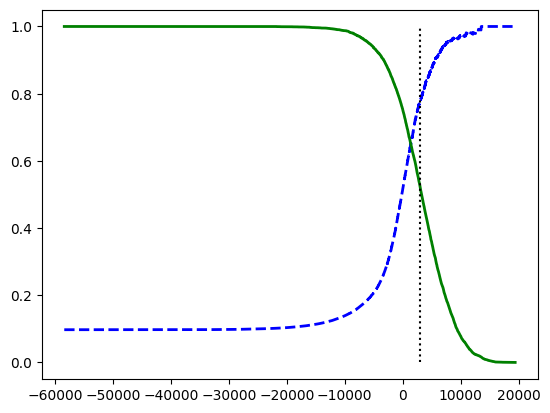

In [28]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) # plots precision values against thresholds as a blue line. -1 excludes the last precions value
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # plots recall values against thresholds as a green line
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold") # adds a vertical line at current threshold
[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show() # displays created plot

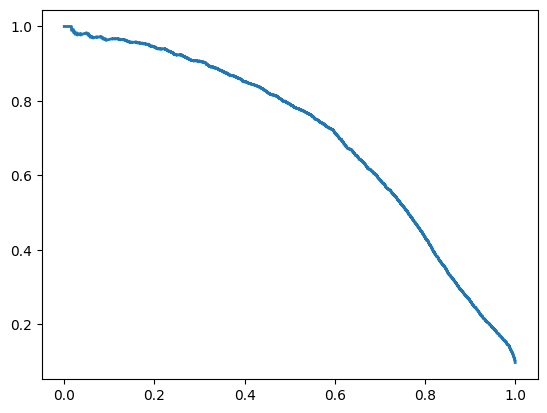

In [29]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve") # plots precision against recall
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show() # shows plot

In [30]:
idx_for_90_precision = (precisions >= 0.90).argmax() # finds index of first threshold where precision is greater than or equal to 90%
threshold_for_90_precision = thresholds[idx_for_90_precision] # gets threshold valye corresponding to index found above
threshold_for_90_precision # displays the threshold value that achieves at least 90%

5558.688951079276

In [31]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)  # predicts labels for training set using threshold determined for 90% precision

In [32]:
precision_score(y_train_8, y_train_pred_90) # calculates and displays precision score of classifier using new predictions

0.9003419638495359

In [33]:
recall_at_90_precision = recall_score(y_train_8, y_train_pred_90) # calculates the recalls core for predictions made with 90% prediction threshold
recall_at_90_precision

0.3149888907878995

In [34]:
from sklearn.metrics import roc_curve # imports roc_curver that computes Reciever Operating Characteristic

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores) # calculates the false positive rate, true positive rate, and thresholds for ROC curve

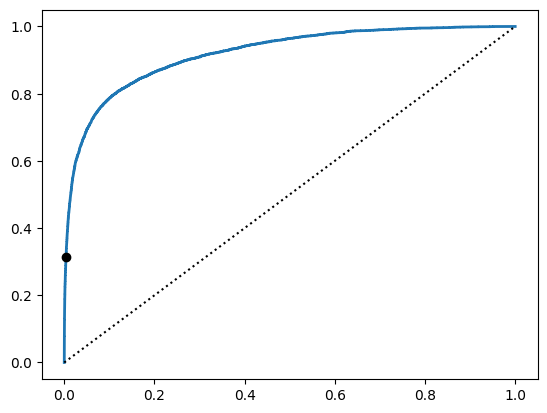

In [35]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax() # finds index of threshold closest to the one chosen for 90% precision
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90] # gets the true positive and false positive rates for the threshold

plt.plot(fpr, tpr, linewidth=2, label="ROC curve") # plots the ROC curve using calculated false positive rates and true positive rates
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve") # plots the random classifier's ROC curve
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision") # plots the point corresponding to the threshold for 90%
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show() # displays plot

In [36]:
from sklearn.metrics import roc_auc_score # imports the roc_auc_score function which calculates the area under the ROC curve

roc_auc_score(y_train_8, y_scores) # calculates the area under the ROC curve using the true labels and the decision scores

0.9192599874103056

In [37]:
from sklearn.svm import SVC # imports the support vector classifier

svm_clf = SVC(random_state=42)  # creates a support vector machine classifier object
svm_clf.fit(X_train[:2000], y_train[:2000]) # trains the svm classifier using the first 2000 samples of training data

SVC(random_state=42)

In [38]:
svm_clf.predict([some_digit]) # uses the trained SVM classifier to predict label for somedigit

array(['8'], dtype=object)

In [39]:
some_digit_scores = svm_clf.decision_function([some_digit]) # calculates the decision scores for the somedigit

some_digit_scores.round(2) # rounds the decision scores to 2 decimal places

array([[-0.29,  6.21,  2.84,  7.12,  1.74,  6.19,  0.72,  4.82,  9.31,
         6.21]])

In [40]:
class_id = some_digit_scores.argmax() # determines the index of the class with the highest decision score for somedigit

class_id # displays the index identified

8

In [41]:
svm_clf.classes_ # displays the array of target classes used in the trained SVM classifier

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [42]:
svm_clf.classes_[class_id] # displays the class with the highest decision score

'8'

In [43]:
from sklearn.multiclass import OneVsRestClassifier # imports the OneVsRestClassifier function

ovr_clf = OneVsRestClassifier(SVC(random_state=42)) # creates a multiclass classifier using the one-vs-the-rest strategy with an SVM classifier as the base estimator
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [44]:
ovr_clf.predict([some_digit]) # uses the trained SVM classifier to predict the label

array(['8'], dtype='<U1')

In [45]:
len(ovr_clf.estimators_) # gets the number of estimators in the ovr_clf

10

In [46]:
sgd_clf = SGDClassifier(random_state=42) # creates a new SGDC object with random state of 42 in order to recreate results
sgd_clf.fit(X_train, y_train) # retains the sgd_clf using the entire training dataset
sgd_clf.predict([some_digit]) # uses the retrained sgd_clf to predict the label for the data point in somedigit

array(['8'], dtype='<U1')

In [47]:
sgd_clf.decision_function([some_digit]).round() # calcs the decision scores for some some digit using retrained sgd_clf and rounds to nearest whole number

array([[-30175.,  -6604.,  -9409.,  -6609., -10872.,  -7165., -33187.,
        -20983.,   2170.,  -4162.]])

In [48]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") # performs a 3 fold cross validation on sgf_clf classifier using the trainding data and evals the models accuracy

array([0.87365, 0.85835, 0.8689 ])

In [49]:
from sklearn.preprocessing import StandardScaler # imports standardscaler which is used for feature scaling
scaler = StandardScaler() # creates a standardscaler object
X_train_scaled = scaler.fit_transform(X_train.astype("float64")) # fits and transforms the training
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") # performs a 3 fold cross validation on sgf_clf classifier using the trainding data and evals the models accuracy

array([0.8983, 0.891 , 0.9018])

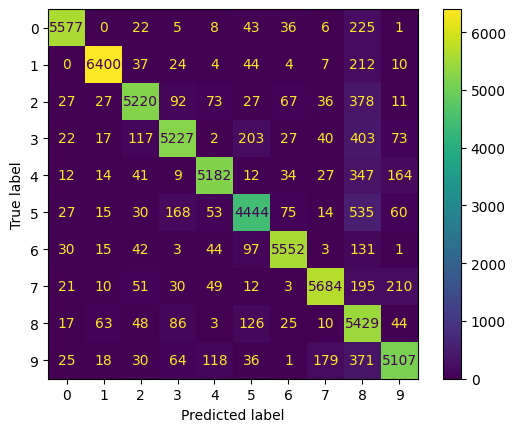

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3) # performs 3 fold cross validation on SCDG using training data and evals the accuracy
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred) # displays the confusion matrix using the true labels and the predicted labels
plt.show() # displays plot

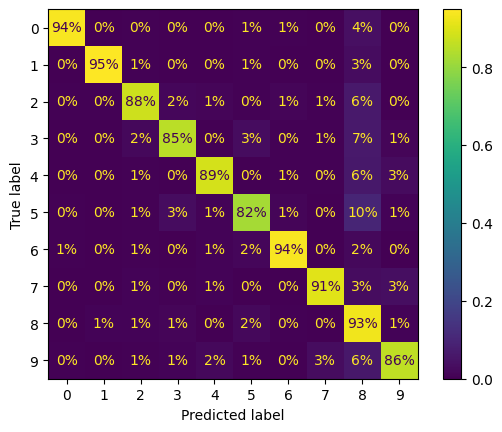

In [52]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%") # generates and displays a confusion matrix
plt.show() # displays normalized confusion matrix

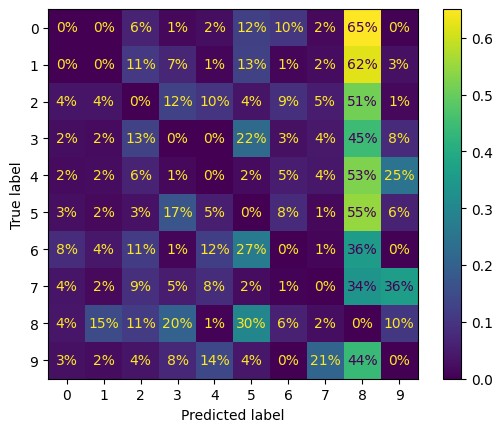

In [53]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                       normalize="true", values_format=".0%") # creates a sampleweight array where inccorect predictions are assigned a weight of 1
plt.show() # displays normalized confusion matrix

In [56]:
cl_a, cl_b = '8', '6' # assigns the string 3 to variable cl_a and strin5 to cl_b variable
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # creates a subset of training data where both true and predicted label are 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # creates a subset of training data where true is 3 and 5 predicted label is 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # creates a subset of training data where true label is 5 and predicted label is 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # creates a subset of training data where both true and predicted labels are 5

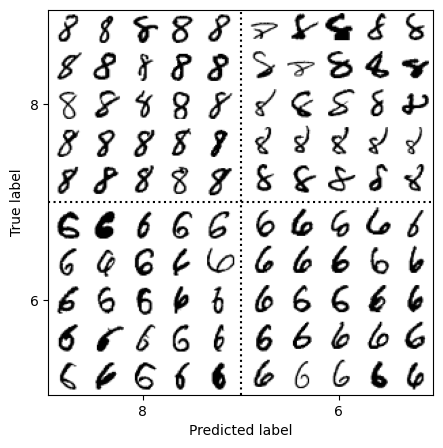

In [57]:
size = 5 # sets size of grid
pad = 0.2 # sets size of padding
plt.figure(figsize=(size, size)) # create a new figure with specified size
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]: # iterates through first 25 images in each set and palces them in appropiate grid position
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [58]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier # imports KNeighborsClassifier function

y_train_large = (y_train >= '7') # creates a boolean array indicating whether each digit is greater than or equal to 7
y_train_odd = (y_train.astype('int8') % 2 == 1) # creates a boolean array indicating whether each digit is odd
y_multilabel = np.c_[y_train_large, y_train_odd] # creates a multilabel array

knn_clf = KNeighborsClassifier() # creates KNeighborsClassifier object with default parameters
knn_clf.fit(X_train, y_multilabel) # trains KNeighborsClassifier using training data and multilabel data

KNeighborsClassifier()

In [59]:
knn_clf.predict([some_digit])  # uses trained KNeighborsClassifier to predict label for somedigit

array([[ True, False]])

In [60]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3) # performs 3 fold cross validation on KNeighborsClassifier using training data and evals the accuracy

f1_score(y_multilabel, y_train_knn_pred, average="macro") # calculates the f1 score using the multilabel true labels and the predicted labels

0.9764102655606048